In [1]:
import pandas as pd

In [5]:
df=pd.read_csv('insurance.csv')

In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df['sex']=df['sex'].astype('category')
df['sex']=df['sex'].cat.codes

In [8]:
df['smoker']=df['smoker'].astype('category')
df['smoker']=df['smoker'].cat.codes

In [9]:
df['region']=df['region'].astype('category')
df['region']=df['region'].cat.codes

In [10]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
X=df.drop(columns='charges')
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [15]:
y=df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [18]:
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
c=lr.intercept_
c

-11701.054604981295

In [22]:
m=lr.coef_
m

array([  244.62646566,  -130.61195022,   345.20224913,   614.9484729 ,
       23352.82553125,  -416.06331304])

In [23]:
y_pred_train=lr.predict(X_train)
y_pred_train

array([ 7.70054300e+03,  6.16576190e+03,  3.08296121e+04,  3.35899091e+03,
        5.77893785e+03,  1.04082323e+04,  3.66348054e+04,  1.13792925e+04,
        2.00887758e+03,  1.29952910e+04,  2.69882602e+03,  1.62711615e+04,
        4.07532516e+03,  7.05380066e+03,  9.36646847e+03,  1.45308762e+04,
        8.76917081e+03,  1.21582275e+04,  2.99963639e+04,  6.62568688e+03,
        2.66347920e+04,  1.29638401e+04,  1.06615683e+04,  2.13550215e+03,
        3.26976954e+04, -1.88057986e+03,  5.97019731e+03,  9.57158897e+03,
        2.68958136e+04,  2.68693403e+04,  1.22597953e+04,  7.62961971e+03,
        2.99456805e+04,  1.34363072e+04,  3.12812145e+03,  4.01191163e+03,
        4.03955121e+04,  7.30326022e+03,  1.09740809e+04,  3.62604525e+03,
        3.86679523e+03,  9.49945479e+03,  3.47216064e+04,  4.62761902e+03,
        8.32197098e+03,  2.11644174e+03,  3.59607316e+04,  4.04548123e+02,
        4.02000007e+03,  1.41725253e+04,  7.87921675e+03,  5.98410618e+03,
        7.35082206e+03,  

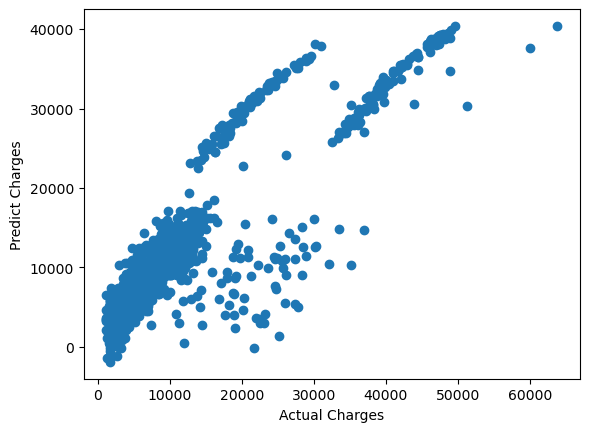

In [24]:
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred_train)
plt.xlabel('Actual Charges')
plt.ylabel('Predict Charges')
plt.show()

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(y_train,y_pred_train)

0.7427609364883971

In [27]:
y_pred_test=lr.predict(x_test)

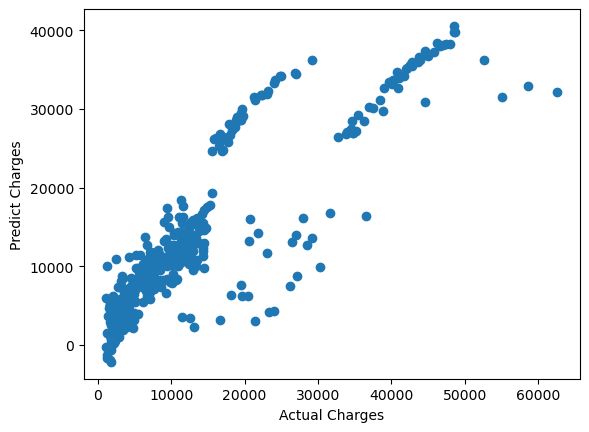

In [28]:
plt.scatter(y_test,y_pred_test)
plt.xlabel('Actual Charges')
plt.ylabel('Predict Charges')
plt.show()

In [29]:
r2_score(y_test,y_pred_test)

0.7648415301644244